In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from NLP_Lib import *

In [ ]:
training_df = pd.read_table(PATH_TO_TRAINING_TSV)
training_df = training_df.drop([ "id", "class"], axis=1)
training_df.columns = ['labels', 'data']
training_df.head()

In [ ]:
training_df["labels+num"] = training_df["labels"].map({
"Homer Simpson" : 1,
"Marge Simpson" : 0,
"Bart Simpson" : 2,
"Lisa Simpson" : 3,
"C. Montgomery Burns" : 4,
"Ned Flanders" : 5,
"Chief Wiggum" : 6,
"Krusty the Clown" : 7,
"Grampa Simpson" : 8,
"Milhouse Van Houten" : 9,
"Waylon Smithers" : 10
})
training_df = training_df[training_df['labels+num'].isin([1,0])]
training_df =training_df.reset_index(drop=True)
training_df.head()

X = training_df['data'].values
Y = training_df['labels+num'].values

In [15]:
print([X[0]])

["Well... okay. If it'll end horror."]


In [ ]:
activation_fnx = "tanh"

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[111, 1024]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

print('Training model...')
r = model.fit(
  embeddings,
  Y,
  epochs=10,
  validation_split = .3
)

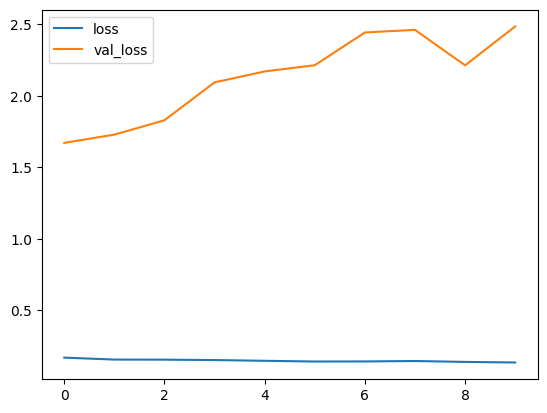

In [252]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

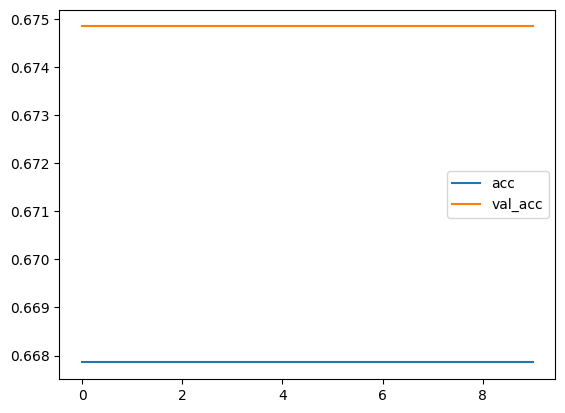

In [253]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
model.predict(data_test)